# Minor Project- Titanic EDA Part 1

#                    by Sanjana Rao

**Problem Statement :**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

**PART ONE**
Complete EDA for Titanic Dataset. Try and draw as many insights about the passengers in the TITANIC.


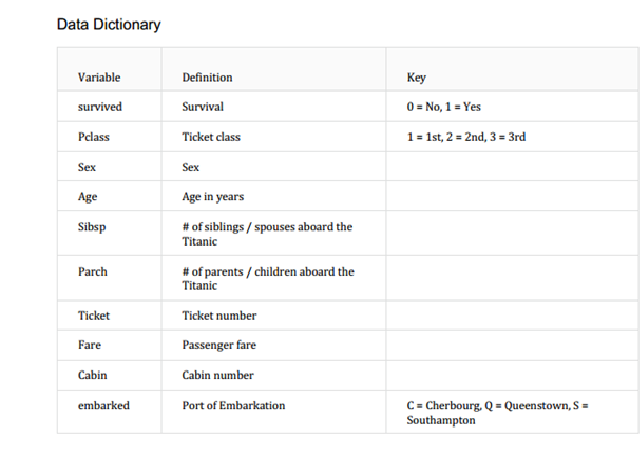

In [2]:
from IPython.display import Image
Image(filename='Data types1.png')

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as titanic
%matplotlib inline
titanic.set_style('darkgrid')

In [4]:
shipp=pd.read_csv('TITANIC.csv')
shipp.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


# Variable Identification

In [5]:
shipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Dependable Variable: Survived
Independent Variables: Pclass,Sex, Age,Fare,Cabin,Embarked
    
    Categorical Variables:
        Survived
        Pclass
        Sex
        Embarked
    
    Continuos Variables:
        Age
        Fare
        Cabin

In [6]:
shipp.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
shipp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the Cabin variable has 687 Null values, we are ignoring it.

# Univariate Analysis

**CATEGORICAL DATA**

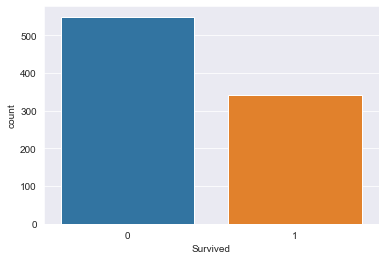

In [8]:
titanic.countplot(x='Survived', data=shipp)

From the Count plot above we can infer that around 550+ passengers have died in this disaster and around 350 people have survived this disaster. The rate of survival of the passengers is relatively less than the rate of deaths.

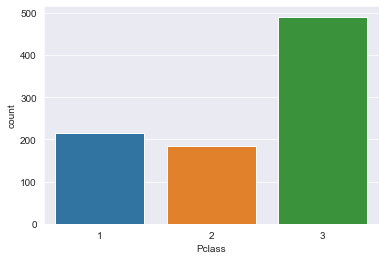

In [9]:
titanic.countplot(x='Pclass', data=shipp)

From the Count plot above we can infer that most of the passengers travelling in the ship belonged to third class, a few of them,slightly less than 200 belonged to 2nd class and around 220 passengers belonged to 1st class.

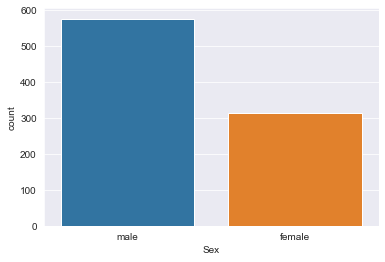

In [10]:
titanic.countplot(x='Sex', data=shipp)

From the Count plot above we can infer that most of the passengers travelling in the ship were male and around 300 of them were female.

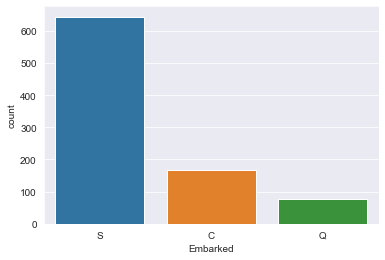

In [11]:
titanic.countplot(x='Embarked', data=shipp)

From the Count plot above we can infer that most of the passengers travelling in the ship had their Port of Embarkation as Sothampton and very few,around less than 100 passengers had their Embarkation Port as Queenstown.

**CONTINUOS DATA**

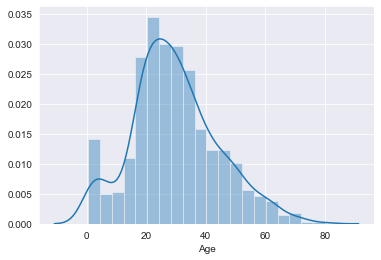

In [12]:
titanic.distplot(shipp['Age'])

From the above Distribution plot we can infer that most of the passengers come under the early 20s age group and the age group of passengers vary from few months to almost 80 years. Positively skewed.

# Bivariate Analysis

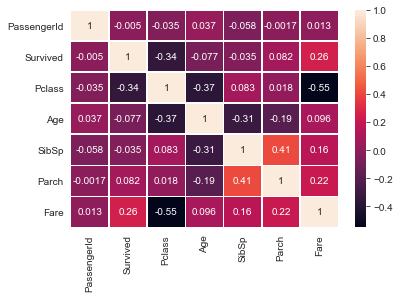

In [13]:
titanic.heatmap(shipp.corr(),annot=True,linewidth=0.5)

**CONTINUOS and CATEGORICAL**

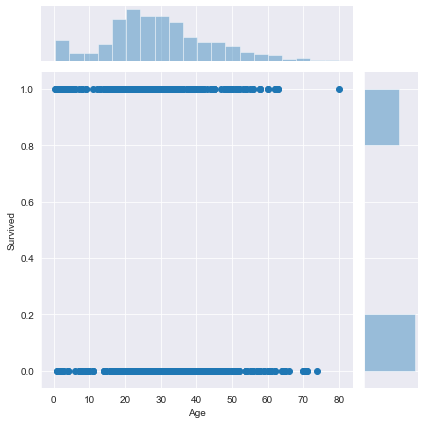

In [14]:
titanic.jointplot(x='Age',y='Survived', data=shipp)


From the above graph we can see that most of the age group between late 50s and mid 60s have survived.

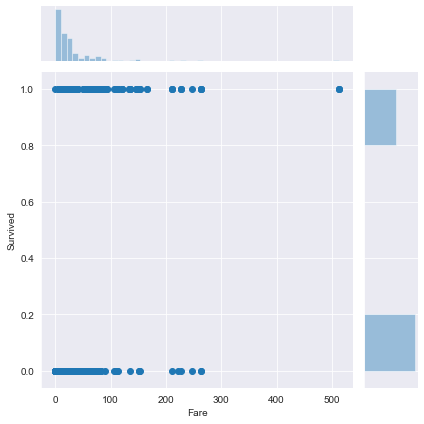

In [15]:
titanic.jointplot(x='Fare',y='Survived', data=shipp)

From the above graph we can infer that people who paid the Fare amount between 100 and 200 had survived than the other passengers. 

**CATEGORICAL AND CATEGORICAL**

In [16]:
counts=shipp.groupby(['Survived','Pclass'],axis=0)
counts.size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

Through the two way table we see that Most of 1st class people have survived compared to other classes and less of second class people have survived.

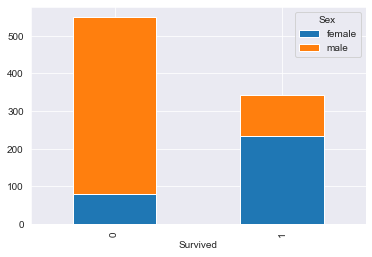

In [17]:
pd.crosstab(shipp['Survived'],shipp['Sex']).plot(kind='bar',stacked=True)


Through the above bar plot we can infer that most of the survivers were female and during the disaster females were given priority so as to be rescued.

In [18]:
counts=shipp.groupby(['Survived','Embarked'],axis=0)
counts.size()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
dtype: int64

From the above two way table we can infer that most of the ship population had boarded their ship from Southampton and Majority of the survivors had their port of Embarkation as Southampton.

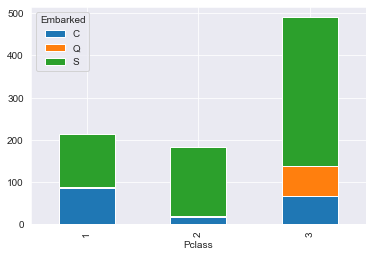

In [19]:

pd.crosstab(shipp['Pclass'],shipp['Embarked']).plot(kind='bar',stacked=True)

From the above bar plot we can infer that most of the passengers had their Port of Embarkation as Southampton and most of the 1st class, 2nd class and 3rd class population boarded the ship from Southampton whereas least of the ship population boarded the ship from Queenstown.

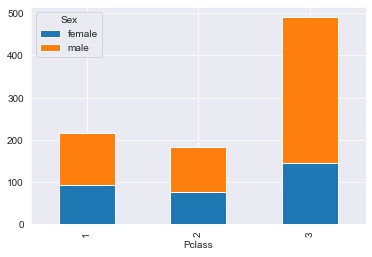

In [20]:

pd.crosstab(shipp['Pclass'],shipp['Sex']).plot(kind='bar',stacked=True)

From the above bar plot we can infer that the male to female ratio of third class is the highest with 347:144

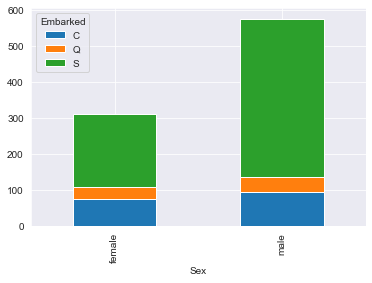

In [21]:

pd.crosstab(shipp['Sex'],shipp['Embarked']).plot(kind='bar',stacked=True)

From the above bar plot we can infer that most of the ship population had boarded their ship from Southampton and Majority of the survivors had their port of Embarkation as Southampton.

# MISSING VALUES TREATMENT

In [22]:
shipp.isnull().values.any()

True

In [23]:
shipp.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since the null percentage of cabin is less than 5% we can ignore that variable.

In [24]:
shipp.drop('Cabin', axis=1, inplace= True)

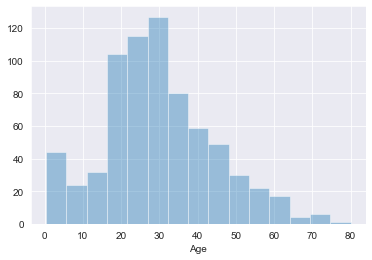

In [25]:
titanic.distplot(shipp['Age'], kde=False, bins=15)

From the above distribution plot,we can infer that Age is a positively skewed distribution, therefore we can use median to treat the missing values.

In [26]:
shipp['Age']=shipp['Age'].fillna(value=shipp['Age'].median())

In [27]:
shipp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


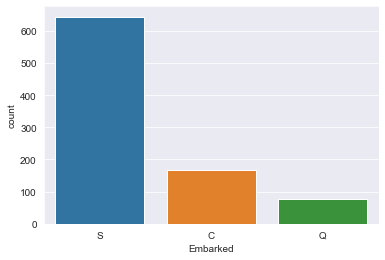

In [28]:
titanic.countplot(x='Embarked', data=shipp)

Since embarked is a categorical data,we use mode to treat the missing values

In [29]:
shipp['Embarked']=shipp['Embarked'].fillna(value='S')

In [30]:
shipp.iloc[829]

PassengerId                                          830
Survived                                               1
Pclass                                                 1
Name           Stone, Mrs. George Nelson (Martha Evelyn)
Sex                                               female
Age                                                   62
SibSp                                                  0
Parch                                                  0
Ticket                                            113572
Fare                                                  80
Embarked                                               S
Name: 829, dtype: object

The mode of Embarked variable was 'S' so only two columns rows had null values in Embarked i.e., row number 62 and 830. Therefore we used fillna to fill all null values with mode, 'S'.

In [31]:
shipp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 62.7+ KB


# Outlier Treatment

In [32]:
shipp['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

**Considering for Pclass 1**

In [33]:
shipp1=shipp[shipp['Pclass']==1]
shipp1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


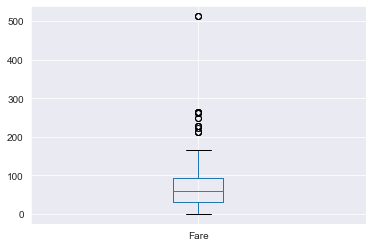

In [34]:
shipp1.boxplot(column=['Fare'])

From the above boxplot we can see the presence of outlier.

In [35]:
IQR=shipp1['Fare'].quantile(0.75)-shipp1['Fare'].quantile(0.25)
print(IQR)

62.57605


In [36]:
uoutlierlim= shipp1['Fare'].quantile(0.75) + 1.5*IQR
loutlierlim= shipp1['Fare'].quantile(0.25) - 1.5*IQR
print(uoutlierlim)
print(loutlierlim)

187.364075
-62.940125


In [37]:
outlierval1=shipp1[(shipp1['Fare']>=uoutlierlim)|(shipp1['Fare']<=loutlierlim)]
outlierval1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,S


From the above, we can infer that the 3 values are data processing error which are around 500, rest are natural.

**Considering for Pclass 2**

In [38]:
shipp2=shipp[shipp['Pclass']==2]
shipp2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S


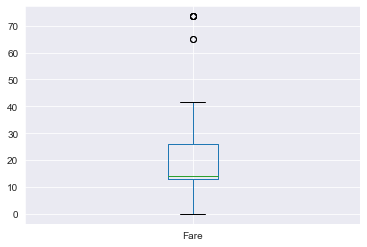

In [39]:
shipp2.boxplot(column=['Fare'])

From the above boxplot,we can see the presence of outliers.

In [40]:
IQR2=shipp2['Fare'].quantile(0.75)-shipp2['Fare'].quantile(0.25)
print(IQR2)

13.0


In [41]:
uoutlierlim2= shipp2['Fare'].quantile(0.75) + 1.5*IQR2
loutlierlim2= shipp2['Fare'].quantile(0.25) - 1.5*IQR2
print(uoutlierlim2)
print(loutlierlim2)

45.5
-6.5


In [42]:
outlierval2=shipp2[(shipp2['Fare']>=uoutlierlim2)|(shipp2['Fare']<=loutlierlim2)]
outlierval2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,S


In [43]:
shipp2['Fare'][72] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][120] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][385] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][615] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][655] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][665] = shipp2['Fare'].quantile(0.95)
shipp2['Fare'][754] = shipp2['Fare'].quantile(0.95)

shipp2['Fare'][72]
shipp2['Fare'][120]
shipp2['Fare'][385]
shipp2['Fare'][615]
shipp2['Fare'][655]
shipp2['Fare'][665]
shipp2['Fare'][754]

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

39.82683242609497

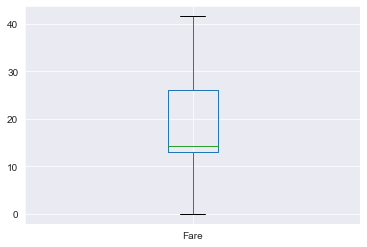

In [44]:
shipp2.boxplot(column = ['Fare'])

Outlier Handled.

**Considering for Pclass 3**

In [45]:
shipp3=shipp[shipp['Pclass']==3]
shipp3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


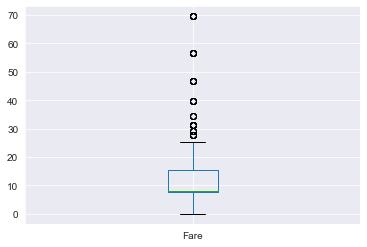

In [46]:
shipp3.boxplot(column='Fare')

In [47]:
IQR3=shipp3['Fare'].quantile(0.75)-shipp3['Fare'].quantile(0.25)
print(IQR3)


7.75


In [48]:
uoutlierlim3= shipp3['Fare'].quantile(0.75) + 1.5*IQR3
loutlierlim3= shipp3['Fare'].quantile(0.25) - 1.5*IQR3
print(uoutlierlim3)
print(loutlierlim3)

27.125
-3.875


In [49]:
outlierval3=shipp3[(shipp3['Fare']>=uoutlierlim3)|(shipp3['Fare']<=loutlierlim3)]
outlierval3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S


Data Processing errors.

# Variable and Dummy Variable creation

**Converting non numeric categorical data to numeric data**

In [50]:
shipp.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [51]:
print(shipp['Sex'].unique())
print(shipp['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [52]:
obj=shipp.dtypes==np.object
print(obj)

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool


In [53]:
del shipp['Name']
del shipp['Ticket']

In [54]:
obj = shipp.dtypes == np.object

print(obj)

PassengerId    False
Survived       False
Pclass         False
Sex             True
Age            False
SibSp          False
Parch          False
Fare           False
Embarked        True
dtype: bool


In [55]:
shipp.columns[obj]

Index(['Sex', 'Embarked'], dtype='object')

In [56]:

dummydf=pd.DataFrame()
for i in shipp.columns[obj]:
    dummy=pd.get_dummies(shipp[i], drop_first=True)
    dummydf=pd.concat([dummydf,dummy],axis=1)
    
print(dummydf)

     male  Q  S
0       1  0  1
1       0  0  0
2       0  0  1
3       0  0  1
4       1  0  1
..    ... .. ..
886     1  0  1
887     0  0  1
888     0  0  1
889     1  0  0
890     1  1  0

[891 rows x 3 columns]


**Concatenating the two**

In [57]:
newship=pd.concat([shipp,dummydf],axis=1)

newship

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,1
888,889,0,3,female,28.0,1,2,23.4500,S,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,0


From the above table, we have dropped the first column for each dummy variable as it can be denoted from '0'.

In [58]:
newship.drop(['Sex','Embarked'], axis=1, inplace=True)

In [59]:
newship

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,28.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


The above table is new table after the dummy variable creation.

In [60]:
newship.to_excel('titanicdata1.xlsx',index=False)